# Interface of the `policy` module

The `policy` modules give you fine-grained control over the training process.
This notebook demonstrates how the `policy` module works and how you can create your own policies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Parameter spaces and phases
Parameter spaces like `linspace` and `cosinespace` are the basic building blocks.

In [2]:
from poutyne.framework import linspace, cosinespace

You can define the space and iterate over them:

In [3]:
space = linspace(1, 0, 3)
for i in space:
    print(i)

1.0
0.5
0.0


In [4]:
space = cosinespace(1, 0, 5)
for i in space:
    print(i)

1.0
0.8535533905932737
0.5
0.14644660940672627
0.0


You can use the space and create a phase with them:

In [5]:
from poutyne.framework import Phase

phase = Phase(lr=linspace(0, 1, 3))

# and iterate
for d in phase:
    print(d)

{'lr': 0.0}
{'lr': 0.5}
{'lr': 1.0}


You can also visualize your phase:

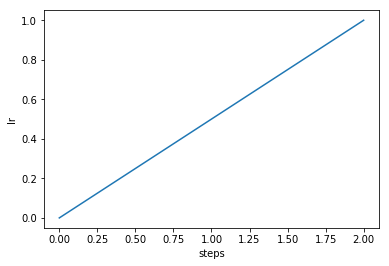

In [6]:
phase.plot("lr");

Phases can have multiple parameters:

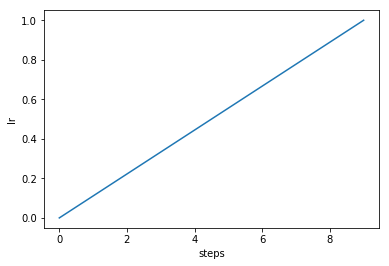

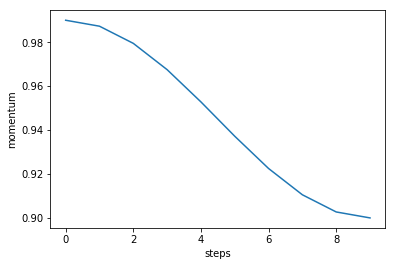

In [7]:
phase = Phase(
    lr=linspace(0, 1, 10),
    momentum=cosinespace(.99, .9, 10),
)

phase.plot("lr");
phase.plot("momentum")

## Visualize different phases

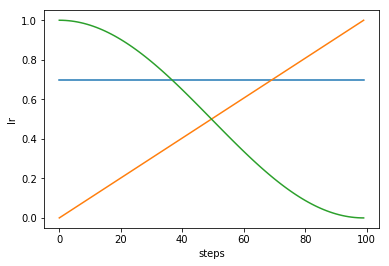

In [8]:
steps = 100

fig, ax = plt.subplots()
# Constant value
Phase(lr=linspace(.7, .7, steps)).plot(ax=ax)
# Linear
Phase(lr=linspace(0, 1, steps)).plot(ax=ax)
# Cosine
Phase(lr=cosinespace(1, 0, steps)).plot(ax=ax);

## Visualize multiple parameters in one phase

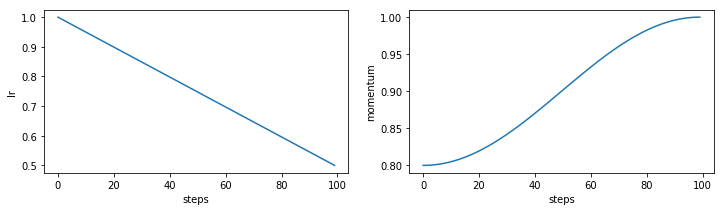

In [9]:
steps = 100
phase = Phase(lr=linspace(1, 0.5, steps), momentum=cosinespace(.8, 1, steps))

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
phase.plot("lr", ax=axes[0])
phase.plot("momentum", ax=axes[1]);

# Build complex policies from basic phases
You can build complex optimizer policies by chaining phases together:

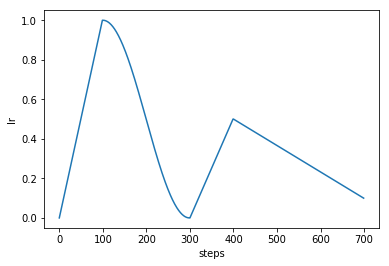

In [10]:
from poutyne.framework import OptimizerPolicy

policy = OptimizerPolicy([
    Phase(lr=linspace(0, 1, 100)),
    Phase(lr=cosinespace(1, 0, 200)),
    Phase(lr=linspace(0, .5, 100)),
    Phase(lr=linspace(.5, .1, 300)),
])

policy.plot();

## Use already defined complex policies

It's easy to build your own policies, but Poutyne contains some pre-defined phases.

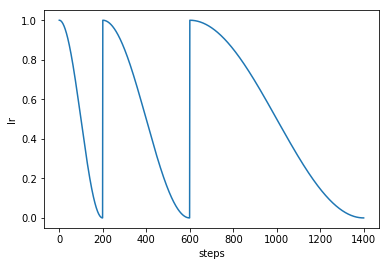

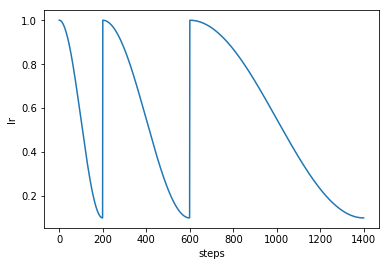

In [11]:
from poutyne.framework import sgdr_phases

# build them manually
policy = OptimizerPolicy([
    Phase(lr=cosinespace(1, 0, 200)),
    Phase(lr=cosinespace(1, 0, 400)),
    Phase(lr=cosinespace(1, 0, 800)),
])
policy.plot()

# or use the pre-defined one
policy = OptimizerPolicy(sgdr_phases(base_cycle_length=200, cycles=3, cycle_mult=2))
policy.plot();

Pre-defined ones are just a list phases:

In [12]:
sgdr_phases(base_cycle_length=200, cycles=3, cycle_mult=2)

[Phase:
     lr: <poutyne.framework.callbacks.policies.cosinespace object at 0x7f6c9af136d8>,
 Phase:
     lr: <poutyne.framework.callbacks.policies.cosinespace object at 0x7f6c9af13668>,
 Phase:
     lr: <poutyne.framework.callbacks.policies.cosinespace object at 0x7f6c9af135c0>]

Here is the one-cycle policy:

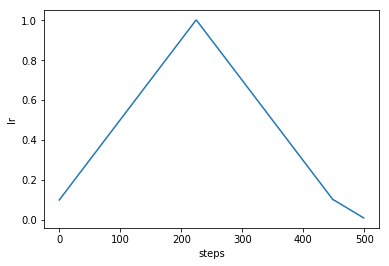

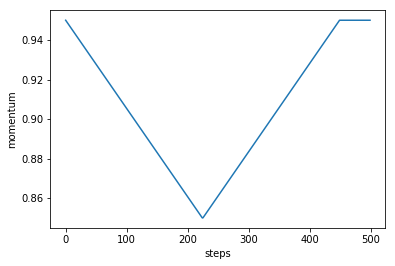

In [13]:
from poutyne.framework import one_cycle_phases

tp = OptimizerPolicy(one_cycle_phases(steps=500))
tp.plot("lr")
tp.plot("momentum");